## Objective

The evaluation metric for this competition is ***Root Mean Squared Logarithmic Error***.

The `RMSLE` is calculated as:

$$\sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2}$$

where:

- $ n $ is the total number of instances,
     
- $\hat{y}$ is the predicted value of the target for instance (i),
   
- $y_i$ is the actual value of the target for instance (i), and,
 
- $log$ is the natural logarithm.

For each id in the test set, you must predict a value for the sales variable. The file should contain a header and have the following format:

    ```
    id,sales
    3000888,0.0
    3000889,0.0
    3000890,0.0
    3000891,0.0
    3000892,0.0
    etc.
    ```


In [27]:
import lux
lux.config.default_display = "lux"
import pandas as pd
from dateutil.parser import *

### holidays

In [34]:
holidays=pd.read_csv("../data/raw/holidays_events.csv", parse_dates=['date'],date_format="%Y-%m-%d")
holidays['date'] = pd.to_datetime(holidays['date'], format='ISO8601')
holidays

/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer for

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### stores

In [33]:
stores=pd.read_csv("../data/raw/stores.csv")
stores.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [22]:
stores

/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer for

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### transactions

In [24]:
transactions=pd.read_csv("../data/raw/transactions.csv", parse_dates=['date'],date_format="%Y-%m-%d")
transactions['date'] = pd.to_datetime(transactions['date'], format='ISO8601')
transactions

/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer for

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### train

In [29]:
train=pd.read_csv("../data/raw/train.csv", parse_dates=['date'],date_format="%Y-%m-%d")
train['date'] = pd.to_datetime(train['date'], format='ISO8601')
train

/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer for

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### test

In [57]:
test=pd.read_csv("../data/raw/test.csv", parse_dates=['date'],date_format="%Y-%m-%d")
test['date'] = pd.to_datetime(test['date'], format='ISO8601')
test

/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer for

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
oil=pd.read_csv("../data/raw/oil.csv", parse_dates=['date'],date_format="%Y-%m-%d")
oil['date'] = pd.to_datetime(oil['date'], format='ISO8601')
oil

/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [58]:

print(f"{stores.shape = }")
print(f"{transactions.shape = }")
print(f"{oil.shape = }")
print(f"{train.shape = }")
print(f"{test.shape = }")

holidays.shape = (350, 6)
stores.shape = (54, 5)
transactions.shape = (83488, 3)
oil.shape = (1218, 2)
train.shape = (3000888, 6)
test.shape = (28512, 5)


In [59]:
print(f"{set((holidays.columns)) = }")
print(f"{set((stores.columns)) = }")
print(f"{set((transactions.columns)) = }")
print(f"{set((oil.columns)) = }")
print(f"{set((train.columns)) = }")
print(f"{set((test.columns)) = }")

set((holidays.columns)) = {'description', 'transferred', 'locale_name', 'date', 'type', 'locale'}
set((stores.columns)) = {'cluster', 'store_nbr', 'type', 'state', 'city'}
set((transactions.columns)) = {'transactions', 'date', 'store_nbr'}
set((oil.columns)) = {'dcoilwtico', 'date'}
set((train.columns)) = {'date', 'store_nbr', 'id', 'family', 'onpromotion', 'sales'}
set((test.columns)) = {'date', 'store_nbr', 'id', 'family', 'onpromotion'}


In [54]:
stores_holidays = set((stores.columns)).intersection(set((holidays.columns)))
stores_holidays


{'type'}

In [56]:
transactions_oil = set((transactions.columns)).intersection(set((oil.columns)))
transactions_oil

{'date'}

In [52]:
transactions_stores = set((transactions.columns)).intersection(set((stores.columns)))
transactions_stores

{'store_nbr'}

In [55]:
train_transactions_stores = set((train.columns)).intersection(set((stores.columns)), set((transactions.columns)))
train_transactions_stores

{'store_nbr'}

## data cleaning with klib

In [66]:
import klib
klib.missingval_plot(holidays)
print(f"{holidays.shape = }")
holidays_cleaned = klib.data_cleaning(holidays)

No missing values found in the dataset.
holidays.shape = (350, 6)
Shape of cleaned data: (350, 6) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-0.0%)



In [67]:
klib.missingval_plot(stores)
print(f"{stores.shape = }")
stores_cleaned = klib.data_cleaning(stores)

No missing values found in the dataset.
stores.shape = (54, 5)
Shape of cleaned data: (54, 5) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-nan%)



/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/klib/utils.py:140: RuntimeWarning:invalid value encountered in scalar divide


In [71]:
stores_cleaned

/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/ubuntu/miniforge3/envs/forecasting/lib/python3.9/site-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [68]:
klib.missingval_plot(transactions)
print(f"{transactions.shape = }")
transactions_cleaned = klib.data_cleaning(transactions)

No missing values found in the dataset.
transactions.shape = (83488, 3)
Shape of cleaned data: (83488, 3) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.03 MB (-53.93%)



oil.shape = (1218, 2)
Shape of cleaned data: (1218, 2) - Remaining NAs: 43


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-50.0%)



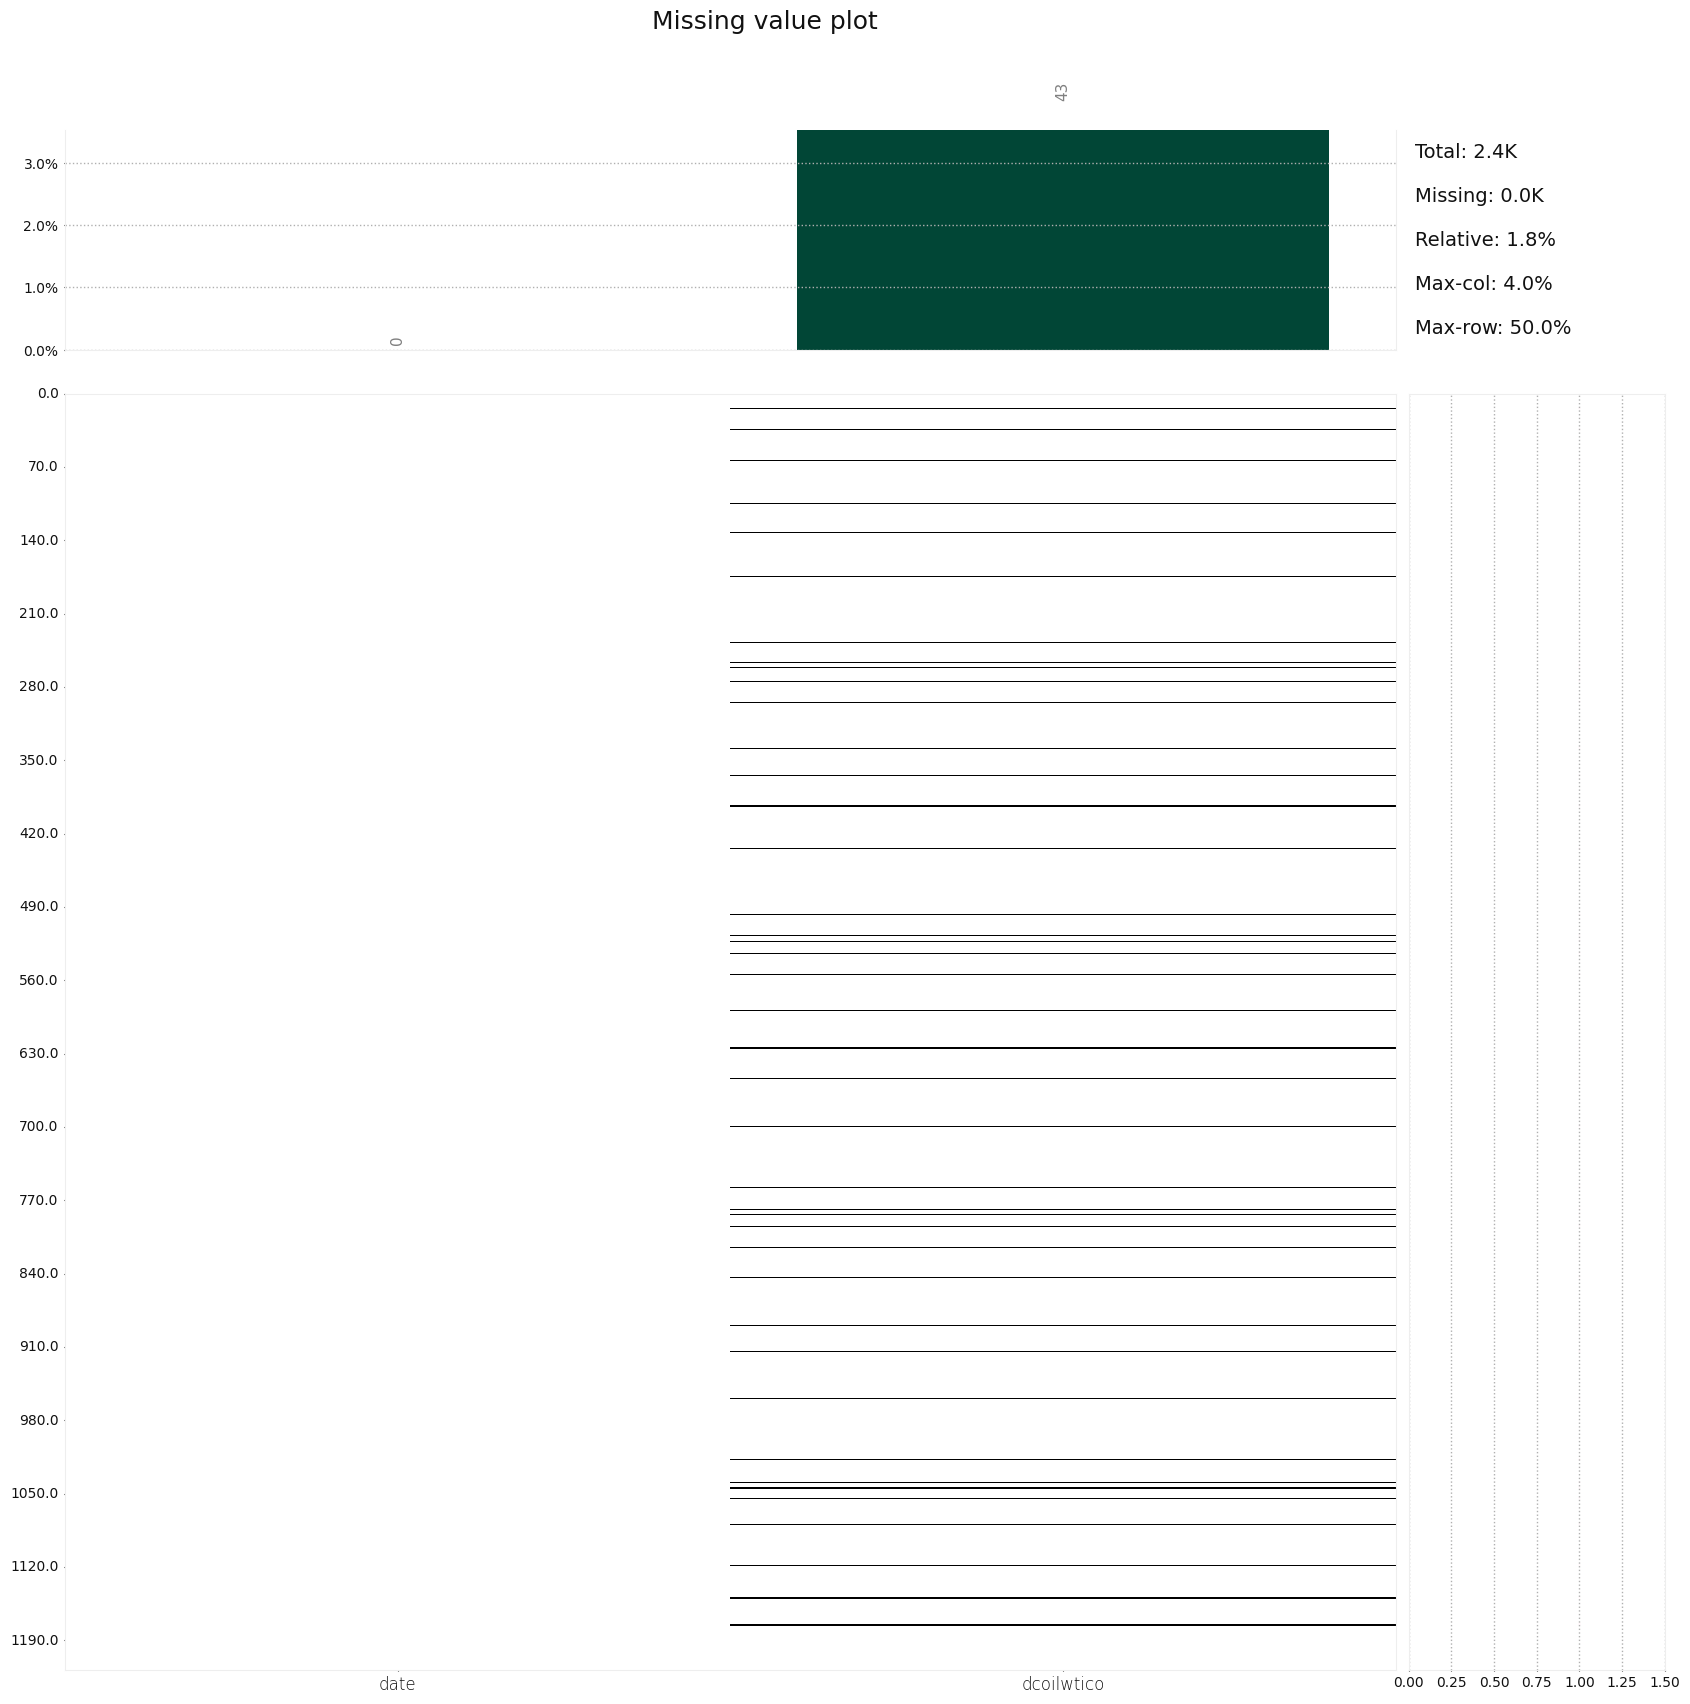

In [69]:
klib.missingval_plot(oil)
print(f"{oil.shape = }")
oil_cleaned = klib.data_cleaning(oil)

In [70]:
klib.missingval_plot(train)
print(f"{train.shape = }")
train_cleaned = klib.data_cleaning(train)

No missing values found in the dataset.
train.shape = (3000888, 6)
Shape of cleaned data: (3000888, 6) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 68.68 MB (-50.0%)

